<a href="https://colab.research.google.com/github/profshai/natural-language-processing/blob/main/yelp_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Reviews Classification using Natural Language Processing



- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users.

### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import dataset

In [2]:
yelp_df = pd.read_csv("yelp.csv")

In [ ]:
# yelp_df.head(5)

In [5]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
yelp_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

### Visualize data

In [9]:
# Let's get the length of the messages
yelp_df['length'] = yelp_df['text'].apply(len)
# yelp_df.head()

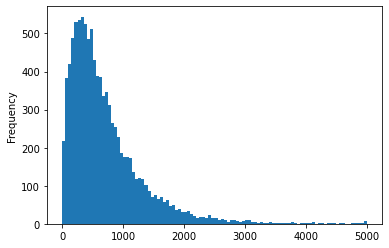

In [10]:
yelp_df['length'].plot(bins=100, kind='hist') 

In [11]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [13]:
# Let's see the longest message 43952
# yelp_df[yelp_df['length'] == 4997]['text'].iloc[0]

In [14]:
# Let's see the shortest message 
yelp_df[yelp_df['length'] == 1]['text'].iloc[0]

'X'

In [15]:
# Let's see the message with mean length 
yelp_df[yelp_df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

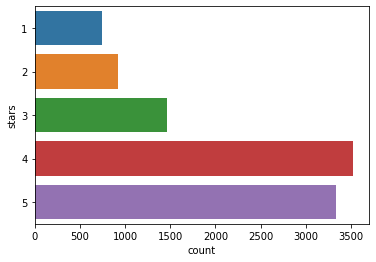

In [16]:
sns.countplot(y = 'stars', data=yelp_df)

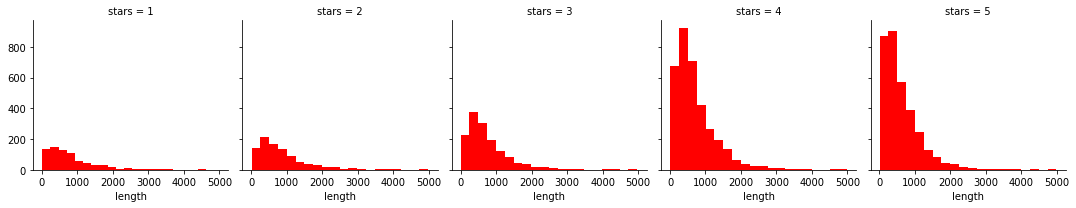

In [18]:
# Distribution of the 'stars' rating
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins = 20, color = 'r')

In [ ]:
# Let's divide the reviews into 1 and 5 stars

In [19]:
yelp_df_1 = yelp_df[yelp_df['stars']==1]

In [20]:
yelp_df_5 = yelp_df[yelp_df['stars']==5]

In [21]:
# We are interested in just the 1 and 5 stars reviews
yelp_df_1_5 = pd.concat([yelp_df_1 , yelp_df_5])

In [22]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [23]:
print( '1-Stars percentage =', (len(yelp_df_1) / len(yelp_df_1_5) )*100,"%")

1-Stars percentage = 18.330885952031327 %


In [24]:
print( '5-Stars percentage =', (len(yelp_df_5) / len(yelp_df_1_5) )*100,"%")

5-Stars percentage = 81.66911404796868 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


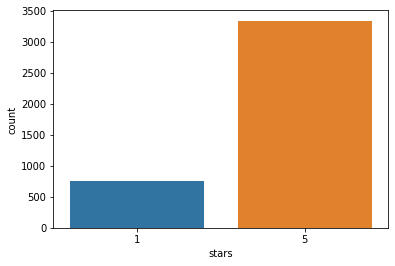

In [25]:
sns.countplot(yelp_df_1_5['stars'], label = "Count") 

### Data cleaning

#### Remove punctuation

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Remove Punctuation example

In [28]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [29]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [30]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

#### Remove stopwords

In [32]:
# You have to download stopwords Package to execute this command
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Remove stopwords example

In [34]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [35]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

In [36]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [38]:
challege = [char for char in mini_challenge if char not in string.punctuation]
challenge = ''.join(challege)
challenge = [word for word in challenge.split() if word.lower() not in stopwords.words('english')]
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

Count vectorizer example

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [40]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [41]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


#### Apply the three previous process to the dataset


In [43]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [45]:
# Let's test the newly added function
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [46]:
print(yelp_df_clean[0]) # show the cleaned up version of row 0

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [47]:
print(yelp_df_1_5['text'][0]) # show the original version

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


#### Count vectorizer to dataset

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])


In [ ]:
#print(vectorizer.get_feature_names())

In [50]:
print(yelp_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
yelp_countvectorizer.shape

(4086, 26435)

### Train model

Train model example

In [52]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values

In [53]:
label

array([1, 1, 1, ..., 5, 5, 5])

In [54]:
NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
testing_sample = ['amazing food! highly recommmended']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([5])

In [56]:
testing_sample = ['shit food, made me sick']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1])

The prediction is accurate.

### Split data into train and test set

In [57]:
X = yelp_countvectorizer
y = label

In [58]:
X.shape

(4086, 26435)

In [59]:
y.shape

(4086,)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluate model

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

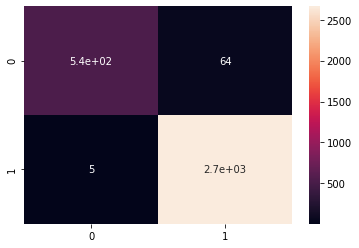

In [64]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

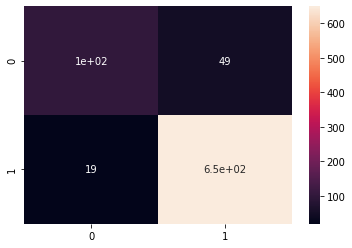

In [65]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [66]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.84      0.67      0.75       150
           5       0.93      0.97      0.95       668

    accuracy                           0.92       818
   macro avg       0.89      0.82      0.85       818
weighted avg       0.91      0.92      0.91       818



End of Notebook!